## RandomForestにいれるだけ

In [49]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

dataset = pd.read_csv('data/train.csv')
testset = pd.read_csv('data/test.csv')

In [50]:
dataset.head()
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values
test = testset.values

In [51]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

predicts = rf.predict(test)

In [52]:
np.savetxt('data/submit_randomforest.csv',
           np.c_[list(range(1, len(test) + 1)), predicts],
           delimiter=',',
           header='ImageId,Label',
           comments='',
           fmt='%d')

In [53]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)
rf2 = RandomForestClassifier(n_estimators=100)
rf2.fit(train_X, train_y)
predicts = rf2.predict(test_X)
print(1.0*(predicts == test_y).astype(np.uint8).sum()/len(test_y))

0.960952380952


## Data  processing

In [54]:
# test_y = test_y.astype(np.uint8)
# train_y = train_y.astype(np.uint8)

# train_X = np.array(train_X).reshape((-1, 1, 28, 28)).astype(np.uint8)
# test_X = np.array(train_X).reshape((-1, 1, 28, 28)).astype(np.uint8)

# test = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

In [55]:
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [59]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
def display_image(l, index):
    plt.imshow(l[0].reshape(28, 28), cmap=cm.binary) # draw the picture

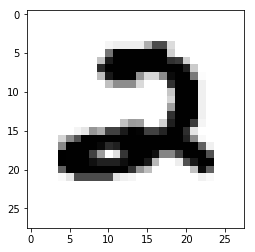

In [60]:
display_image(test, 0)

In [61]:
def dense_to_one_hot(labels_dense, num_classes=10):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

# train_y = dense_to_one_hot(train_y)
test_y_1hot = dense_to_one_hot(test_y)
train_y_1hot = dense_to_one_hot(train_y)

In [62]:
# nomalization
test_X_nom = np.multiply(test_X, 1.0 / 255)
train_X_nom = np.multiply(train_X, 1.0 / 255)

In [63]:
epochs_completed = 0
index_in_epoch = 0
num_examples = train_X_nom.shape[0]
num_examples

29400

In [64]:
def next_batch(batch_size):
    """Return the next `batch_size` examples from this data set."""
    global train_X_nom
    global train_y
    global index_in_epoch
    global epochs_completed
    
    start = index_in_epoch
    index_in_epoch += batch_size
    if index_in_epoch > num_examples:
        # Finished epoch
        epochs_completed += 1
        # Shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        train_X_nom = train_X_nom[perm]
        train_y = train_y[perm]
        # Start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return train_X_nom[start:end], train_y[start:end]

In [65]:
import tensorflow as tf


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                          padding='SAME')

In [66]:
train_X_nom[np.arange(5)]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [69]:
_y = tf.nn.softmax(tf.matmul(x, W) + b)

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>

In [70]:
W_conv1 = weight_variable([5, 5, 1, 32])

<tf.Variable 'Variable_2:0' shape=(5, 5, 1, 32) dtype=float32_ref>